In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [4]:
df = pd.read_csv('clean_sub.csv')

C:\Users\Kenneth Lay\AppData\Local\Temp\ipykernel_21048\3085248192.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('clean_sub.csv')


In [4]:
df

,Unnamed: 0,id,country,operator,service,source,status,cycle,adnet,revenue,...,service_price,currency,profile_status,publisher,attempt_charging,success_billing,combined_created_date,is_successful,revenue_usd,service_price_usd
0,0,302164,TH,ais,459505104,sms,0,daily,Unknown,0,...,6,BATH,Active,Unkown,15,0,13/ September/ 2023 - 9,0,0.00,0.1800
1,1,3521,TH,ais,459505104,sms,0,daily,Unknown,0,...,6,BATH,Active,Unkown,15,0,13/ September/ 2023 - 9,0,0.00,0.1800
2,2,1,TH,ais,459505106,ivr,0,1,Unknown,6,...,6,BATH,Active,Unkown,1,1,13/ September/ 2023 - 9,1,0.18,0.1800
3,3,4999335,TH,ais,459505105,wap,0,daily,star,0,...,6,BATH,Active,star,5,0,13/ September/ 2023 - 14,0,0.00,0.1800
4,4,273196,TH,ais,459505104,sms,0,daily,Unknown,0,...,6,BATH,Active,Unkown,15,0,13/ September/ 2023 - 9,0,0.00,0.1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308033,308906,22019,OM,omantel,goaly,cp1,0,daily,kee,0,...,300,Rial,Unsub,lumos,1,0,14/ September/ 2023 - 6,0,0.00,0.0072
308034,308907,22037,OM,omantel,goaly,cp1,0,daily,kee,0,...,300,Rial,Unsub,lumos,1,0,14/ September/ 2023 - 6,0,0.00,0.0072
308035,308908,22062,OM,omantel,goaly,cp1,0,daily,kee,0,...,300,Rial,Unsub,lumos,1,0,14/ September/ 2023 - 6,0,0.00,0.0072
308036,308909,22083,OM,omantel,goaly,cp1,0,daily,kee,0,...,300,Rial,Unsub,lumos,1,0,14/ September/ 2023 - 6,0,0.00,0.0072


In [5]:

X = df[['country', 'operator', 'service', 'source', 'status', 'cycle', 'adnet',
        'revenue', 'unsubs_from', 'service_price', 'currency', 'profile_status',
        'publisher', 'attempt_charging']]
y = df['is_successful']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=['int', 'float']).columns
categorical_features = ['country', 'operator', 'service', 'cycle', 'profile_status']

X_train[categorical_features] = X_train[categorical_features].astype(str)
X_test[categorical_features] = X_test[categorical_features].astype(str)

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore'), categorical_features)
    ])

# Create a linear regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LinearRegression())
])

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

c:\Users\Kenneth Lay\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Mean Squared Error: 0.07946827433877661
R-squared: 0.5591389361933354


c:\Users\Kenneth Lay\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


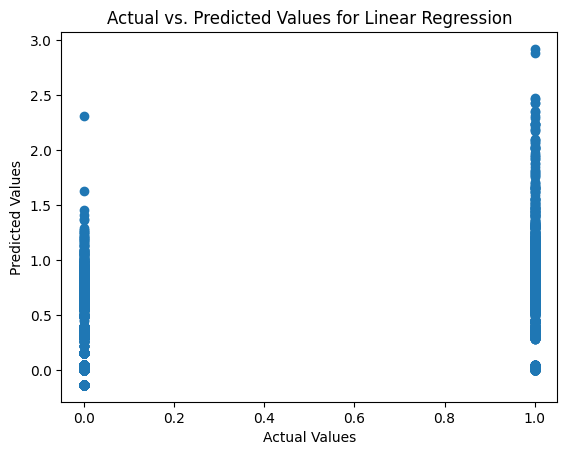

In [6]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Linear Regression')
plt.show()


In [7]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)

print(f'R-squared: {r2}')

R-squared: 0.5591389361933354


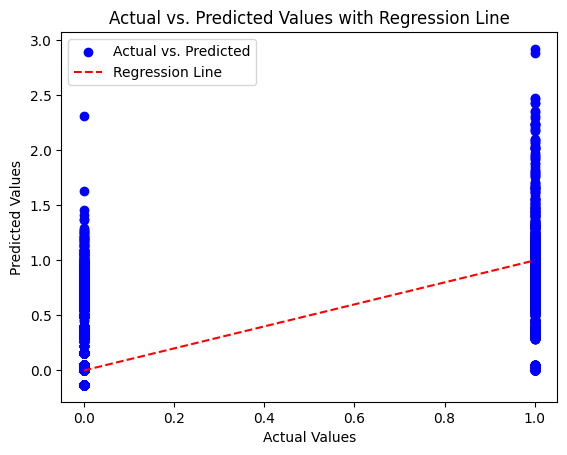

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Plot the regression line
xmin, xmax = min(y_test), max(y_test)
x_line = np.linspace(xmin, xmax, 100)
y_line = x_line  # Assuming a simple linear regression model y = mx + b
plt.plot(x_line, y_line, color='red', linestyle='--', label='Regression Line')

plt.title('Actual vs. Predicted Values with Regression Line')
plt.legend()
plt.show()


In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
categorical_columns = ['country', 'operator', 'service', 'cycle', 'profile_status']
df[categorical_columns] = df[categorical_columns].astype(str)

# Define features (X) and target variable (y)
X = df[['country', 'operator', 'service', 'source', 'status', 'cycle', 'adnet',
       'subs_date', 'renewal_date', 'unsubs_from', 'unsubs_date', 'currency',
       'publisher', 'attempt_charging', 'service_price_usd']]
y = df['is_successful']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=['int', 'float']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=True, handle_unknown='ignore'), categorical_features)
    ])

# Create a logistic regression model with increased max_iter
logistic_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=10000))  # Adjust the max_iter value as needed
])

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
conf_matrix = confusion_matrix(y_test, y_pred_logistic)
classification_report_logistic = classification_report(y_test, y_pred_logistic)

print(f'Accuracy (Logistic Regression): {accuracy_logistic}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_report_logistic}')

Accuracy (Logistic Regression): 0.9159362420464875
Confusion Matrix:
[[43874  3200]
 [ 1979 12555]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94     47074
           1       0.80      0.86      0.83     14534

    accuracy                           0.92     61608
   macro avg       0.88      0.90      0.89     61608
weighted avg       0.92      0.92      0.92     61608



c:\Users\Kenneth Lay\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [4, 5, 6, 7, 9, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


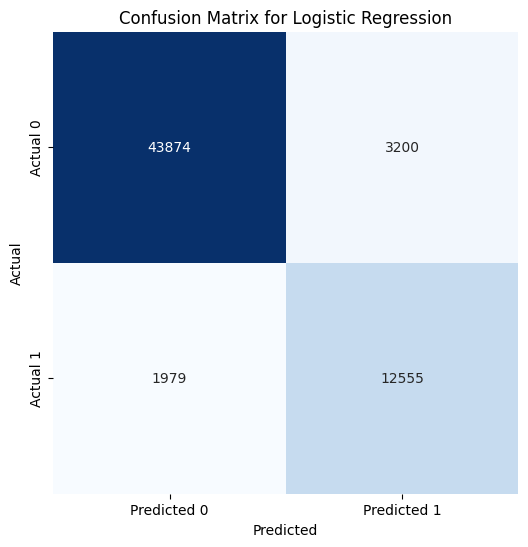

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_logistic)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

c:\Users\Kenneth Lay\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [4, 5, 6, 7, 9, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


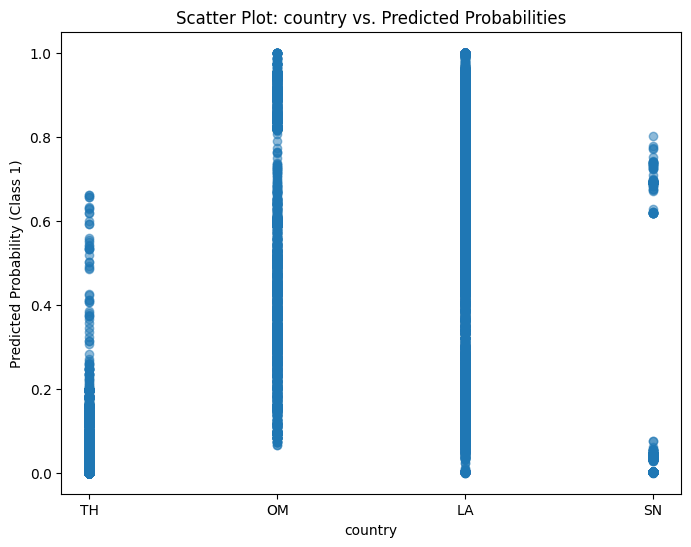

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Get predicted probabilities for the positive class (class 1)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

# Choose a feature to plot against predicted probabilities
feature_to_plot = 'country'

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_test[feature_to_plot], y_pred_proba, alpha=0.5)
plt.xlabel(feature_to_plot)
plt.ylabel('Predicted Probability (Class 1)')
plt.title(f'Scatter Plot: {feature_to_plot} vs. Predicted Probabilities')
plt.show()

c:\Users\Kenneth Lay\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [4, 5, 6, 7, 9, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


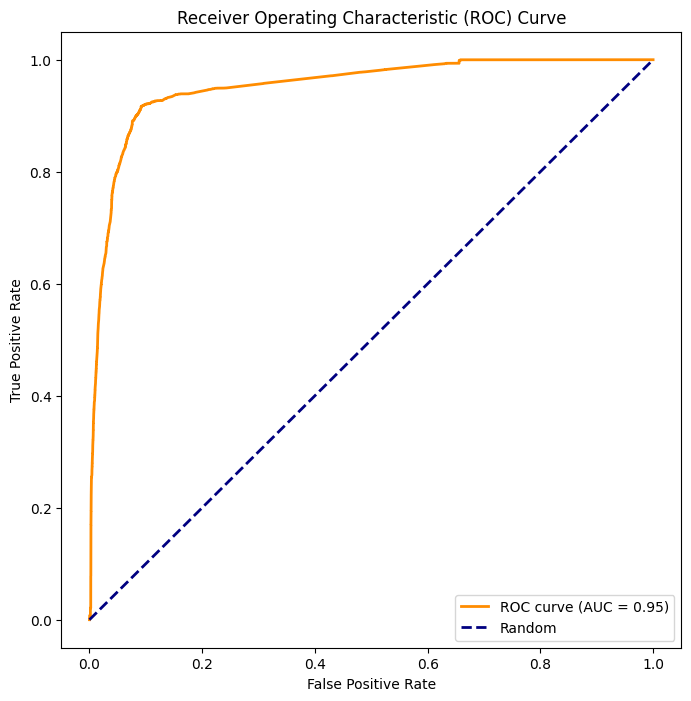

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_logistic)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [14]:
# Get the one-hot encoded feature names directly from the categorical transformer
cat_transformer = logistic_model.named_steps['preprocessor'].named_transformers_['cat']
feature_names_cat = list(cat_transformer.get_feature_names_out(input_features=X[categorical_features].columns))

# Combine numeric feature names with one-hot encoded categorical feature names
all_feature_names = list(numeric_features) + feature_names_cat

# Create a DataFrame to store feature names and their corresponding coefficients
feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Coefficient': coefficients})

# Sort the features based on their absolute coefficients
feature_importance_df['Absolute Coefficient'] = np.abs(feature_importance_df['Coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Absolute Coefficient'])
plt.xlabel('Feature')
plt.ylabel('Absolute Coefficient')
plt.title('Logistic Regression Feature Importance')
plt.xticks(rotation=90)
plt.show()

NameError: name 'coefficients' is not defined

In [ ]:
feature_importance_df

,Feature,Coefficient,Absolute Coefficient
274422,unsubs_from_sms,-7.664201e+00,7.664201e+00
275374,unsubs_date_2022-11-26 06:46:55.000,-7.067526e+00,7.067526e+00
280216,unsubs_date_2023-07-18 14:53:14.000,-6.987370e+00,6.987370e+00
280511,unsubs_date_2023-07-24 07:38:21.000,-6.911350e+00,6.911350e+00
280201,unsubs_date_2023-07-17 15:16:41.000,-6.756695e+00,6.756695e+00
...,...,...,...
285070,unsubs_date_2023-09-08 08:45:51.000,-7.563255e-07,7.563255e-07
285355,unsubs_date_2023-09-10 08:26:08.000,-7.563255e-07,7.563255e-07
190684,subs_date_2023-08-15 07:48:13,6.204114e-08,6.204114e-08
282626,unsubs_date_2023-08-15 07:47:37.000,6.204114e-08,6.204114e-08


In [9]:
bc = feature_importance_df.sort_values(by=['Absolute Coefficient'],ascending=False)
bc

NameError: name 'feature_importance_df' is not defined

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import shap

# Assuming you have your dataset loaded into the DataFrame 'df'
# Adjust this based on your actual dataset and column names
X = df.drop('success_billing', axis=1)
y = df['success_billing']

# Assuming you have your logistic regression model and preprocessor defined
# logistic_regression_model = ...
# preprocessor = ...

# Fit the preprocessor and the logistic regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_preprocessed = preprocessor.fit_transform(X_train)
logistic_regression_model.fit(X_train_preprocessed, y_train)

# Assuming you have your logistic explainer defined
# logistic_explainer = ...

# Batch processing for SHAP values
batch_size = 100  # Adjust the batch size based on available memory

# Ensure the shape of the background data matches the expected shape
background_data = X_train_preprocessed.iloc[:batch_size]
logistic_explainer = shap.Explainer(logistic_regression_model.predict_proba, background_data=background_data)

num_batches = 1

shap_values_list = []

#for i in range(num_batches):
start_idx = 0
end_idx = 10

# Ensure the shape of t
# he input data matches the background data used by the masker
X_test_batch_preprocessed = preprocessor.transform(X_test.iloc[start_idx:end_idx])

# Explain the model's predictions using SHAP values for the current batch
shap_values_batch = logistic_explainer.shap_values(X_test_batch_preprocessed)

# Append the SHAP values for the current batch to the list
shap_values_list.append(shap_values_batch)

# Concatenate SHAP values from all batches
shap_values = np.vstack(shap_values_list)

# Summary plot
shap.summary_plot(shap_values, X_test_preprocessed, feature_names=preprocessor.get_feature_names_out())

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get the coefficients from the logistic regression model
coefficients = logistic_model.named_steps['classifier'].coef_[0]

# Get the original categorical feature names
feature_names_cat = list(X[categorical_features].columns)

# Print lengths for debugging
print("Length of numeric_features:", len(numeric_features))
print("Length of feature_names_cat:", len(feature_names_cat))
print("Length of coefficients:", len(coefficients))

# Ensure lengths match
if len(numeric_features) + len(feature_names_cat) != len(coefficients):
    raise ValueError("Length mismatch between feature names and coefficients.")

# Combine numeric feature names with original categorical feature names
all_feature_names = list(numeric_features) + feature_names_cat

# Create a DataFrame to store feature names and their corresponding coefficients
feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Coefficient': coefficients})

# Sort the features based on their absolute coefficients
feature_importance_df['Absolute Coefficient'] = np.abs(feature_importance_df['Coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='Absolute Coefficient', ascending=False)
# Train the model
logistic_model.fit(X_train, y_train)

# Get the one-hot encoded feature names directly from the categorical transformer after fitting
cat_transformer = logistic_model.named_steps['preprocessor'].named_transformers_['cat']
feature_names_cat = cat_transformer.get_feature_names_out(input_features=X[categorical_features].columns)

# Ensure lengths match
if len(numeric_features) + len(feature_names_cat) != len(coefficients):
    raise ValueError("Length mismatch between feature names and coefficients.")

# Combine numeric feature names with original categorical feature names
all_feature_names = list(numeric_features) + list(feature_names_cat)

# Create a DataFrame to store feature names and their corresponding coefficients
feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Coefficient': coefficients})

# Sort the features based on their absolute coefficients
feature_importance_df['Absolute Coefficient'] = np.abs(feature_importance_df['Coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Absolute Coefficient'])
plt.xlabel('Feature')
plt.ylabel('Absolute Coefficient')
plt.title('Logistic Regression Feature Importance')
plt.xticks(rotation=90)
plt.show()

# Plot the feature importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Absolute Coefficient'])
plt.xlabel('Feature')
plt.ylabel('Absolute Coefficient')
plt.title('Logistic Regression Feature Importance')
plt.xticks(rotation=90)
plt.show()

Length of numeric_features: 3
Length of feature_names_cat: 12
Length of coefficients: 286994


ValueError: Length mismatch between feature names and coefficients.

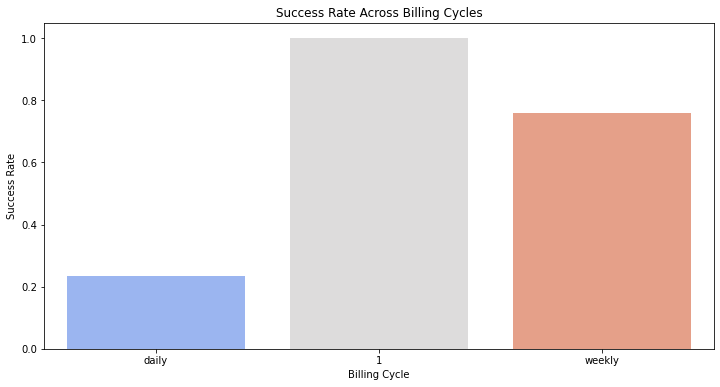

In [ ]:
# Assuming 'cycle' is a feature in your dataset
plt.figure(figsize=(12, 6))
sns.barplot(x='cycle', y='is_successful', data=df, ci=None, palette='coolwarm')
plt.title('Success Rate Across Billing Cycles')
plt.xlabel('Billing Cycle')
plt.ylabel('Success Rate')
plt.show()

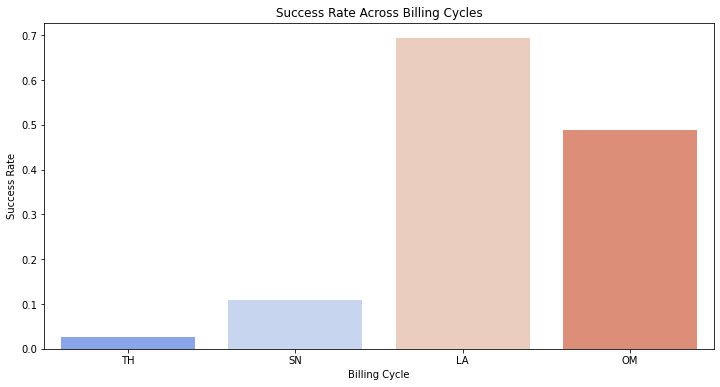

In [ ]:
# Assuming 'cycle' is a feature in your dataset
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='is_successful', data=df, ci=None, palette='coolwarm')
plt.title('Success Rate Across Billing Cycles')
plt.xlabel('Billing Cycle')
plt.ylabel('Success Rate')
plt.show()

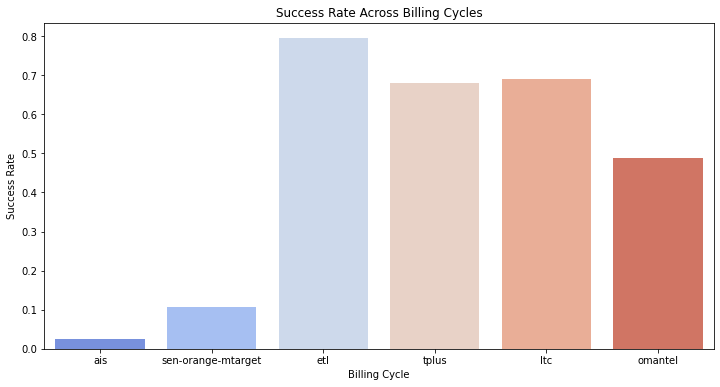

In [ ]:
# Assuming 'cycle' is a feature in your dataset
plt.figure(figsize=(12, 6))
sns.barplot(x='operator', y='is_successful', data=df, ci=None, palette='coolwarm')
plt.title('Success Rate Across Billing Cycles')
plt.xlabel('Billing Cycle')
plt.ylabel('Success Rate')
plt.show()

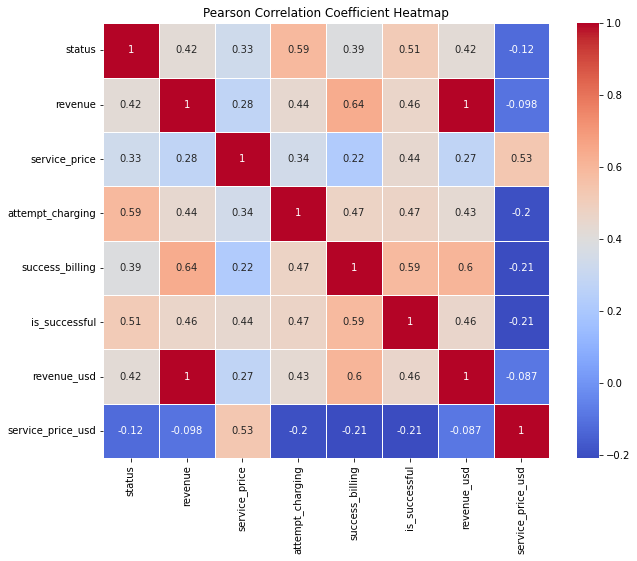

In [ ]:
corr_matrix = df.corr()

# Create a heatmap using seaborn
df = df.loc[:, ~df.columns.str.startswith('Unnamed')]
df = df.loc[:, ~df.columns.str.startswith('id')]

# Calculate the Pearson correlation matrix
corr_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Pearson Correlation Coefficient Heatmap')
plt.show()



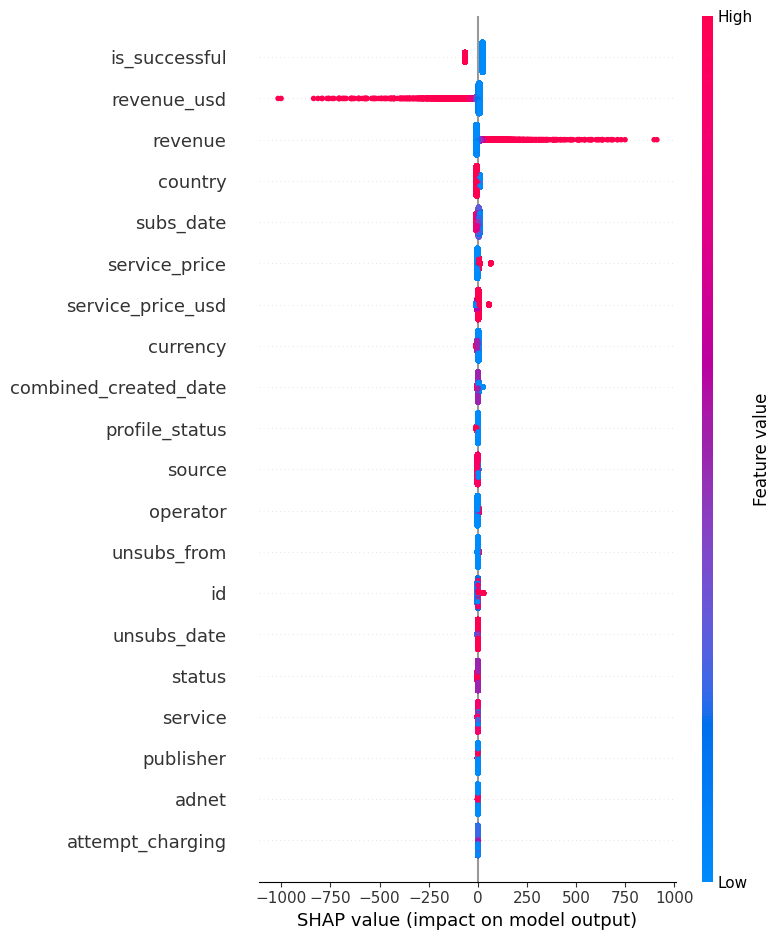

In [20]:

import shap
from sklearn.preprocessing import LabelEncoder


 #Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

#Create a copy of the DataFrame to avoid modifying the original data
X = df.copy()
y = X.pop('success_billing')

# Encode categorical variables
label_encoders = {}
for column in categorical_cols:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column].astype(str))  # Ensure consistent type
    label_encoders[column] = le

# Scale the data
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a logistic regression model with increased max_iter
model = LogisticRegression(max_iter=10000)  # Adjust the max_iter value as needed
model.fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Create a summary plot
shap.summary_plot(shap_values[0], X_test)
#shap.plots.heatmap(shap_values)

In [ ]:
#explainer = shap.Explainer(
   # logistic_model, X_train
#)
#shap_values = explainer(X_test)
#shap.plots.beeswarm(shap_values)

In [ ]:
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import HashingEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# Access the trained logistic regression model
trained_logistic_model = logistic_model.named_steps['classifier']

# Custom transformer to skip target variable during fit
class PassthroughTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X

# Define a preprocessor using ColumnTransformer and Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('hashing_encoder', HashingEncoder(cols=categorical_columns, n_components=10), categorical_columns)
    ],
    remainder='passthrough'
)
# Define categorical columns
categorical_columns = ['country', 'operator', 'service', 'source', 'status', 'cycle', 'adnet',
                        'subs_date', 'renewal_date', 'unsubs_from', 'unsubs_date', 'currency',
                        'publisher', 'attempt_charging', 'service_price_usd', 'cp1']

# Define a preprocessor using ColumnTransformer and Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('hashing_encoder', HashingEncoder(cols=categorical_columns, n_components=10), categorical_columns)
    ],
    remainder='passthrough'
)

# Create a pipeline with the preprocessor, passthrough transformer, and the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('passthrough', PassthroughTransformer()),
    ('classifier', trained_logistic_model)
])

# Fit the pipeline with the training data
pipeline.fit(X_train, y_train)  # Provide y_train as the target variable

# Use the KernelExplainer for linear models
explainer = shap.KernelExplainer(pipeline.predict_proba, X_test)
shap_values = explainer.shap_values(X_test)

# Summary plot (bee swarm plot)
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, show=False)
plt.show()

ValueError: A given column is not a column of the dataframe

In [8]:
corr_matrix = df.corr()

# Create a heatmap using seaborn
df = df.loc[:, ~df.columns.str.startswith('Unnamed')]
df = df.loc[:, ~df.columns.str.startswith('id')]

# Calculate the Pearson correlation matrix
corr_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Pearson Correlation Coefficient Heatmap')
plt.show()

ValueError: could not convert string to float: 'sms'

In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'id', 'country', 'operator', 'service', 'source',
       'status', 'cycle', 'adnet', 'revenue', 'subs_date', 'renewal_date',
       'freemium_end_date', 'unsubs_from', 'unsubs_date', 'service_price',
       'currency', 'profile_status', 'publisher', 'attempt_charging',
       'success_billing', 'combined_created_date', 'is_successful',
       'revenue_usd', 'service_price_usd'],
      dtype='object')
